# Machine Learning Engineer Nanodegree

## Capstone Project - Vitor R. Machado

### Predicting the mortality of cancer patients in ICESP

This project aims to build a machine learning model to help ICESP in predicting the mortality of cancer patients based on several features such as age, type of cancer, stage of cancer, and so on. ICESP has a network of hospitals which treats cancer patients. 
The dataset for this project is very detailed and have information of patients from 2000 to 2017. It can be easily found on the internet and it doesn't contains private information such as names or tax numbers.

<hr/>

In [1]:
import warnings
warnings.filterwarnings('ignore')

from os.path import isfile, isdir
import urllib
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile as zp

%matplotlib inline

# full dataset https://github.com/vitorrmachado/udacity_mlnanodegree_capstone_proposal/raw/master/datasets/dataset.zip
# 10000 samples https://github.com/vitorrmachado/udacity_mlnanodegree_capstone_proposal/raw/master/datasets/dataset-samples.zip

'''
    Downloading the dataset:
    The original dataset was in .dbf format. I converted it to a csv file, and uploaded to my github repository.
    Although it is possible to work with dbf files, I believe that for the purpose of this project, it is better to
    convert it and work with Pandas dataframe.
'''
dataset_file = 'datasets/dataset.csv'
if not isfile(dataset_file):
    dataset_zip = 'datasets/dataset.zip'
    if not isfile(dataset_zip):
        url = 'https://github.com/vitorrmachado/udacity_mlnanodegree_capstone_proposal/raw/master/datasets/dataset.zip'
        print "downloading dataset"
        urllib.urlretrieve(url, dataset_zip)
        print "extracting dataset"
        zip_f = zp(dataset_zip)
        zip_f.extractall('datasets')
data = pd.read_csv(dataset_file)
print 'Dataset loaded!'

Dataset loaded!


<hr/>

## Data exploration

The idea here is to explore the data. Firstly, the first 5 rows of the dataset will be presented along with the name of all columns. The column <b>ULTINFO</b> defines if a person left the hospital alive (values 1 or 2) or dead (3 or 4) after the treatment. If we unify the values we can found the percentage for the two cases in the dataset.

<hr/>

In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

pd.options.display.max_columns = 81
display(data.head(n=5))

def plot_bar(data, color, x_ticks, x_label, y_label, fig_size=(8,5)):
    fig = plt.figure(figsize = fig_size)

    index_data =np.arange(len(data))
    index_ticks = np.arange(len(x_ticks))

    rects1 = plt.bar(index_data, data, .6, color=color, label='', align='center')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.xticks(index_ticks, x_ticks)

    plt.tight_layout()
    plt.show()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,QUIMIOANT,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,PERDASEG,ERRO,IBGEATEN
0,9,54,1,BA,SP,3522109,ITANHAEM,9,15,1,3,C504,C50,"MAMA, QUADRANTE SUPERIOR EXTERNO DA",85003,"CARCINOMA DUCTAL INFILTRANTE, SOE",I,I,1,0,0,1C,0,X,8,8,8,8,8,8,ECI,NaN,NaN,NaN,NaN,8,I,I,J,J,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2009-12-09,3,0,63,63,2008,XIF,XI - OUTRAS NEOPLASIAS MALIGNAS EPITELIAIS E M...,F - OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIF...,50-59,8,NaN,NaN,NaN,0,0,3548500
1,9,77,2,SP,SP,3513504,CUBATAO,2,15,1,3,C509,C50,"MAMA, SOE (EXCLUI PELE DA MAMA C44.5)",85003,"CARCINOMA DUCTAL INFILTRANTE, SOE",IIIB,III,4,0,0,4,0,0,8,8,8,8,8,8,III B,NaN,NaN,NaN,NaN,8,G,G,J,J,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2014-09-02,2,2,2,0,2008,XIF,XI - OUTRAS NEOPLASIAS MALIGNAS EPITELIAIS E M...,F - OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIF...,70+,8,NaN,NaN,NaN,1,0,3548500
2,9,59,2,SP,SP,3541000,NaN,9,15,2,3,C508,C50,"MAMA, LESAO SOBREPOSTA DA",85003,"CARCINOMA DUCTAL INFILTRANTE, SOE",IIA,II,2,0,0,2,1,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,8,G,G,J,B,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2016-06-30,1,0,105,105,2009,XIF,XI - OUTRAS NEOPLASIAS MALIGNAS EPITELIAIS E M...,F - OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIF...,50-59,8,NaN,NaN,NaN,0,0,3548500
3,4,31,2,SP,GO,5200050,ABADIA DE GOIAS,2,15,1,3,C539,C53,COLO DO UTERO,80703,"CARCINOMA ESCAMOCELULAR, SOE",IIIB,III,X,X,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,8,F,F,J,J,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2015-10-01,2,13,106,93,2013,XIF,XI - OUTRAS NEOPLASIAS MALIGNAS EPITELIAIS E M...,F - OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIF...,30-39,8,NaN,NaN,NaN,0,0,3509502
4,9,67,2,GO,GO,5200050,ABADIA DE GOIAS,9,31,2,2,C693,C69,COROIDE,87203,"MELANOMA MALIGNO, SOE",II,II,2,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,8,B,B,J,J,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2008-02-22,2,22,4,26,2003,XID,XI - OUTRAS NEOPLASIAS MALIGNAS EPITELIAIS E M...,D - MELANOMA MALIGNO,60-69,8,NaN,NaN,NaN,1,0,3550308


In [3]:
'''
    Unfortunately, reducing the data to 1/7 of the full size is necessary because the full dataset was consuming all the
    available memory. Even a virtual machine created in Microsoft Azure was having trouble with the full dataset. pandas.concat
    and gridsearchcv.fit were giving memory error when using the full dataset.
'''

subsetsize = (len(data)/7)

#Shuffle the dataset, reset the index and slice a subset containing 1/7 of the full dataset
data = data.sample(frac=1).reset_index(drop=True)[:subsetsize]

total_records = len(data)

total_live = len(data[(data.ULTINFO == 1) | (data.ULTINFO == 2)])

total_died = len(data[(data.ULTINFO == 3) | (data.ULTINFO == 4)])

print "Total number of records: {}".format(total_records)
print "Number of individuals who lived: {nb} - {pc:.2f}%".format(nb=total_live, pc=(total_live*100.)/total_records)
print "Number of individuals who died: {nb} - {pc:.2f}%".format(nb=total_died, pc=(total_died*100.)/total_records)

Total number of records: 105033
Number of individuals who lived: 62296 - 59.31%
Number of individuals who died: 42737 - 40.69%


<hr/>

<b>Is the age a determining factor for the mortality by cancer?</b> <br/>There are several factors which can contribute for the mortality of the cancer (the health of the patient, the type of cancer, the locality of the cancer). It is known that the age compromises the immune system, reduces vaccine efficacy and compromises the recovery of injuries and diseases (more in this <a href="http://www.webmd.com/healthy-aging/guide/seniors-boost-immunity#1">link</a>). But can the cancer be more lethal for elderly patients than for young patients? <br/>
To check this information, the column <b>FAIXAETAR</b> will be useful. It defines the age range of the patient (for instance, from 50 to 59 years old - 50-59). Combining this column with <b>ULTINFO</b> with values 3 and 4 will give the number of dead patients for each age range.

<hr/>

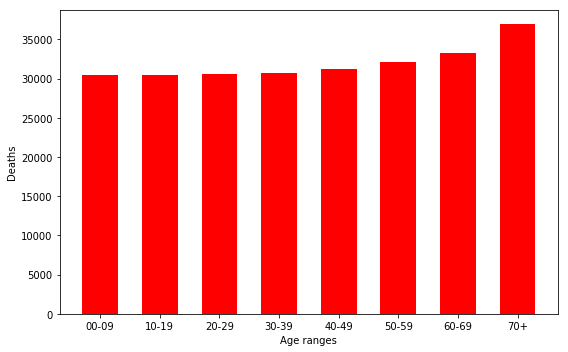

In [4]:
age_ranges = sorted(data['FAIXAETAR'].unique())
total_deaths_age = [len(data[(data.ULTINFO == 3) | (data.ULTINFO == 4) & (data.FAIXAETAR == i)]) for i in age_ranges]

plot_bar(total_deaths_age, 'r', age_ranges, 'Age ranges', 'Deaths')

<hr/>

Accordingly to the graph above, the number of deaths increases with the age, what suggests that the age is an important factor to determine if a person will survive or not the cancer treatment. <br/>The same exploration can be performed to investigate the most lethal type of cancer. 4 columns define the type (and the location) of the cancer: <b>MORFO</b>, <b>DESCMORFO</b>, <b>TOPO</b> and <b>DESCTOPO</b>. MORFO and DESCMORFO define the type of the cancer (code and description). For instance, the malignant melanoma has the code 87203. TOPO and DESCTOPO define the location of the cancer (code and description). For example, if the cancer is in the prostate the TOPO will be C619. <br/>To perform this investigation the position of the cancer may not be relevant, therefore MORFO and DESCMORFO are going to be the only columns used. Since there are several types of cancer, only the first 10 will be presented.

<hr/>

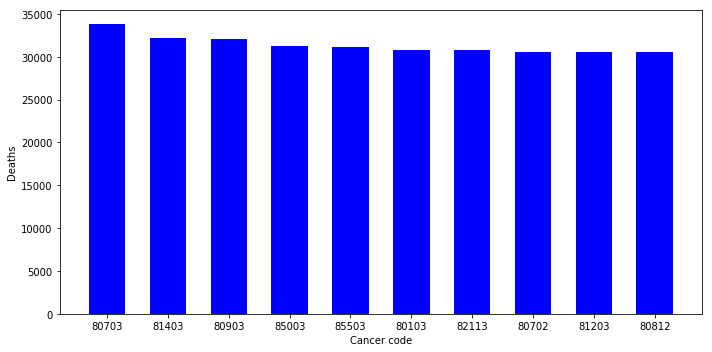

Description of each cancer code: 

80703 CARCINOMA ESCAMOCELULAR, SOE
81403 ADENOCARCINOMA, SOE
80903 CARCINOMA BASOCELULAR, SOE
85003 CARCINOMA DUCTAL INFILTRANTE, SOE
85503 CARCINOMA DE CELULAS ACINOSAS
80103 CARCINOMA, SOE
82113 ADENOCARCINOMA TUBULAR
80702 CARCINOMA ESCAMOCELULAR IN SITU, SOE
81203 CARCINOMA DE CELULAS TRANSICIONAIS, SOE
80812 DOENCA DE BOWEN


In [5]:
import operator

types_cancer = sorted(data['MORFO'].unique())
total_deaths = {i : len(data[(data.ULTINFO == 3) | (data.ULTINFO == 4) & (data.MORFO == i)]) for i in types_cancer}

cancer_sorted = sorted(total_deaths.items(), key=operator.itemgetter(1), reverse=True)[:10]

#cancer_code = zip(*cancer_sorted)[0] - There is some bug when using the zip function along with the import of ZipFile
#num_deaths = zip(*cancer_sorted)[1]

cancer_code = []
num_deaths = []
for element in cancer_sorted:
    cancer_code.append(element[0])
    num_deaths.append(element[1])

plot_bar(num_deaths, 'b', cancer_code, 'Cancer code', 'Deaths', (10,5))

print "Description of each cancer code: \n"

for code in cancer_code:
    print code, data[data.MORFO == code].iloc[0]['DESCMORFO']

<hr/>
## Preprocessing the data

A preprocess of the dataset is required before feeding it into the machine learning algorithm. There are several unnecessary columns and categorical and numerical columns to be treated prior to training and testing the model.

#### Unnecessary columns:
It is easy to recognize the unnecessary columns in the dataset only looking at the <a href='https://github.com/vitorrmachado/udacity_mlnanodegree_capstone_proposal/raw/master/columns_definition.pdf'>columns description</a> file. The following columns are going to be removed from the dataset:

<ul>
    <li>
        ESCOLARI - Patient's education degree 
    </li>
    <li>
        UFNASC - State in which the patient was born
    </li>
    <li>
        UFRESID - State in which the patient lives
    </li>
    <li>
        IBGE - Brazilian code for the state in which the patient lives
    </li>
    <li>
        CIDADE - City in which the patient lives
    </li>
    <li>
        CATEATEND - Categories representing the method of payment for the treatment
    </li>
    <li>
        CLINICA - ID of the hospital where the patient received its diagnostic
    </li>
    <li>
        BASEDIAG - ID​ representing​ the​ method​ used for​ the​ diagnostic
    </li>
    <li>
        TOPOGRUP - ID​ representing​ the​ group​ of​ the topography
    </li>
    <li>
        DESCTOPO - A​ brief​ description​ of​ the topography
    </li>
    <li>
        DESCMORFO - A​ brief​ description​ of​ the morphology
    </li>
    <li>
        ECGRUP - ID​ representing​ the​ group​ of​ the stage​ of​ the​ cancer
    </li>
    <li>
        NAOTRAT - ID​ representing​ the​ reasons​ in which​ there​ was​ no​ treatment
    </li>
    <li>
        ANODIAG - Year​ of​ the​ diagnostic
    </li>
    <li>
        CICIGRUP - Brief​ description​ of​ the​ group​ in ICCC
    </li>
    <li>
        CICISUBGRU - Brief​ description​ of​ the​ subgroup​ in ICCC
    </li>
    <li>
        FAIXAETAR - Age​ range​ of​ the​ patient (redundant - the age is already given)
    </li>
    <li>
        INSTORIG - The hospital in which the patient was born
    </li>
    <li>
        DRS - Regional​ Resident​ Health Department​ of​ the​ patient (governamental information)
    </li>
    <li>
        RRAS - Regional​ Network​ of​ Patient​ Home Health​ Care (governamental information)
    </li>
    <li>
        DTULTINFO - Date of the last update of patient’s condition
    </li>
    <li>
        IBGEATEN - Code​ of​ the​ Brazilian​ state​ in​ which the​ treatment​ was​ performed, according​ to​ IBGE
    </li>
</ul>

The description of these columns suggest that they are unnecessary to predict whether a patient will survive or not since all of them are describing information about the cancer (like its name) or the patient (like the patient's address). Probably these columns are used only for visualization purposes. 
<hr/>

In [4]:
columns_to_remove = ['ESCOLARI','UFNASC','UFRESID','IBGE','CIDADE','CATEATEND','CLINICA','BASEDIAG','TOPOGRUP',
                     'DESCTOPO','DESCMORFO','ECGRUP','NAOTRAT','ANODIAG','CICIGRUP','CICISUBGRU','FAIXAETAR','INSTORIG',
                     'DRS','RRAS','DTULTINFO','IBGEATEN']

data = data.drop(columns_to_remove, axis=1)

<hr/>

Also, there are some columns which contains several zeros or NaN values (for instance, the column <b>ERRO</b>). I believe that these columns will not help in the performance of the algorithm. Below there is an investigation of the values contained in each column. The idea here is to check the most frequently occurring element of each column.

<hr/>

In [5]:
print "Showing the column, the most frequent value (mode) and the percentage of this value in all dataset. \n"

columns_to_remove = []
for col in data.columns.values: 
    value_counts = data[col].value_counts(dropna=False)    
    most_f_value = value_counts.index[0]
    count_value = value_counts.values[0]
    
    total_percent = count_value*100./total_records
    if total_percent > 50:
        print "{c}: value {v} - {pc:.2f}%".format(c=col,v=most_f_value,pc=total_percent)
    if total_percent == 100:
        columns_to_remove.append(col)

Showing the column, the most frequent value (mode) and the percentage of this value in all dataset. 

SEXO: value 1 - 50.12%
DIAGPREV: value 1 - 65.10%
N: value 0 - 50.83%
M: value 0 - 70.24%
PT: value nan - 51.34%
PN: value nan - 51.79%
PM: value nan - 53.64%
S: value 8 - 100.00%
G: value 8 - 94.12%
LOCALTNM: value 8 - 99.76%
IDMITOTIC: value 8 - 99.98%
PSA: value 8 - 98.35%
GLEASON: value 8 - 98.35%
OUTRACLA: value nan - 93.12%
META01: value nan - 87.13%
META02: value nan - 96.44%
META03: value nan - 98.98%
META04: value nan - 99.75%
TRATFANTES: value J - 100.00%
TRATFAPOS: value J - 96.58%
NENHUM: value 0 - 91.68%
CIRURGIA: value 1 - 62.31%
RADIO: value 0 - 73.12%
QUIMIO: value 0 - 64.68%
HORMONIO: value 0 - 87.89%
TMO: value 0 - 99.58%
IMUNO: value 0 - 99.43%
OUTROS: value 0 - 92.92%
NENHUMANT: value 1 - 99.92%
CIRURANT: value 0 - 100.00%
RADIOANT: value 0 - 100.00%
QUIMIOANT: value 0 - 100.00%
HORMOANT: value 0 - 100.00%
TMOANT: value 0 - 100.00%
IMUNOANT: value 0 - 100.00%
OUTROA

<hr/>

The columns S, TRATFANTES, CIRURANT, RADIOANT, QUIMIOANT, HORMOANT, TMOANT, IMUNOANT, OUTROANT, ERRO have the same 
static value for all data points in the dataset. I believe that they will not help the model because they do not help
to distinguish if a person survived or not. Also, in most of these columns the value is 0. META01, META02 and META03 will also be removed because more than 95% of the data set has missing values in these columns.

<hr/>

In [6]:
data = data.drop(columns_to_remove, axis=1)
data = data.drop(['META01','META02','META03'], axis=1)

<hr/>

#### Processing numerical features:
There are some numerical features in the dataset that require some kind of processing. IDADE, for instance, has a range from 0 to 97. This large difference between values may affect the model and the benchmark model, therefore a normalization is required. 

<hr/>

In [7]:
from sklearn.preprocessing import MinMaxScaler

def print_stats(feature):
    print "Minimum ", np.min(data[feature])
    print "Maximum ", np.max(data[feature])
    print "Mean ", np.mean(data[feature])
    print "Median ", np.median(data[feature])
    print "Standard Deviation ", np.std(data[feature])
    
print_stats('IDADE')

print '\nNormalizing the age feature \n'
scaler = MinMaxScaler()

data['IDADE'] = scaler.fit_transform(data['IDADE'])

print_stats('IDADE')

Minimum  0
Maximum  103
Mean  59.6642674207
Median  62.0
Standard Deviation  16.9224657263

Normalizing the age feature 

Minimum  0.0
Maximum  1.0
Mean  0.57926473224
Median  0.601941747573
Standard Deviation  0.164295783751


C:\Python27\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python27\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


<hr/>

The same can be performed for CONSDIAG and TRATCONS.

<hr/>

In [8]:
data['CONSDIAG'] = scaler.fit_transform(data['CONSDIAG'])

print_stats('CONSDIAG')

print '\n'

data['TRATCONS'] = scaler.fit_transform(data['TRATCONS'])

print_stats('TRATCONS')

Minimum  0.0
Maximum  1.0
Mean  0.00188802594529
Median  0.000781524754797
Standard Deviation  0.00642999563318


Minimum  0.0
Maximum  1.0
Mean  0.00235792632609
Median  0.00125043960767
Standard Deviation  0.00600924857742


C:\Python27\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Python27\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning

In [9]:
display(data.head(n=3))

,IDADE,SEXO,DIAGPREV,TOPO,MORFO,EC,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META04,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,QUIMIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,CICI,LATERALI,PERDASEG
0,0.621359,2,1,C444,80903,I,1,0,0,NaN,NaN,NaN,8,8,8,8,8,NaN,NaN,A,A,J,J,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0.002188,0.016451,365,XIE,8,0
1,0.504854,2,2,C539,80703,IIIB,X,X,0,X,X,X,8,8,8,8,8,NaN,NaN,B,B,J,J,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,4,0.001446,0.001016,63,XIF,8,0
2,0.844660,1,1,C619,81403,IV,4,0,0,4,0,0,8,8,8,8,8,GRAU 9,NaN,A,A,J,J,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,3,0.000000,0.000000,0,XIF,8,0


<hr/>

#### Processing categorical features:
The rest of the features in the dataset are categorical, although they may present numbers as values. Since that in some of these features there are numbers defining the possible values, they must be transformed into dummy fetures in order to apply the same "weight" on these values. Also, typically learning algorithms expect input to be numeric, which requires that non-numeric features be converted. However, there are several NaN values in some features. But firstly, it is necessary to handle these missing values in categorical features. I decided to replace missing values with the mode value for the feature (more about this solution <a href='https://medium.com/airbnb-engineering/overcoming-missing-values-in-a-random-forest-classifier-7b1fc1fc03ba'>here</a>).
<hr/>

In [10]:
from scipy.stats import mode

#This method shows how many NaN values exist in each column from the dataset
total_nans = data.isnull().sum()

print "Features with missing values: \n\n", total_nans[total_nans.values > 0]

features_to_fill = total_nans[total_nans.values > 0].index.values

for feature in features_to_fill:
    mode = data[feature].value_counts().index[0]  
    data[feature] = [mode if pd.isnull(i) else i for i in data[feature]]

Features with missing values: 

PT           53920
PN           54397
PM           56336
OUTRACLA     97803
META04      104767
TRATHOSP         6
CICI           935
dtype: int64


After filling the missing values with the mode, it is time to create the dummy features for the categorical features. The features that will be affected are SEXO, DIAGPREV, TOPO, MORFO, EC, T, N, M, PT, PN, PM, G, LOCALTNM,
IDMITOTIC, PSA, GLEASON, OUTRACLA, META04, TRATAMENTO, TRATHOSP, TRATFAPOS, TRATFANTES, DIAGTRAT, CICI and LATERALI.

In [11]:
dummy_features = ['SEXO', 'DIAGPREV', 'TOPO', 'MORFO', 'EC', 'T', 'N', 'M', 'PT', 'PN', 'PM', 'G', 'LOCALTNM', 
                  'IDMITOTIC', 'PSA', 'GLEASON', 'OUTRACLA', 'META04', 'TRATAMENTO', 
                  'TRATHOSP', 'TRATFAPOS', 'TRATFANTES', 'DIAGTRAT', 'CICI', 'LATERALI']
for feature in dummy_features:
    print "Getting dummies for ", feature
    data = pd.concat([data, pd.get_dummies(data[feature],prefix=feature)], axis=1)
    del data[feature]


Getting dummies for  SEXO
Getting dummies for  DIAGPREV
Getting dummies for  TOPO
Getting dummies for  MORFO
Getting dummies for  EC
Getting dummies for  T
Getting dummies for  N
Getting dummies for  M
Getting dummies for  PT
Getting dummies for  PN
Getting dummies for  PM
Getting dummies for  G
Getting dummies for  LOCALTNM
Getting dummies for  IDMITOTIC
Getting dummies for  PSA
Getting dummies for  GLEASON
Getting dummies for  OUTRACLA
Getting dummies for  META04
Getting dummies for  TRATAMENTO
Getting dummies for  TRATHOSP
Getting dummies for  TRATFAPOS
Getting dummies for  TRATFANTES
Getting dummies for  DIAGTRAT
Getting dummies for  CICI
Getting dummies for  LATERALI


<hr/>
    To finish the preprocessing, it is time to turn <b>ULTINFO</b> into the output classes. Just to remember, the ULTINFO defines if a person survived (1 if survived without cancer, 2 otherwise) or not (3 if died from cancer and 4 if not). 1 and 2 will become 1, and 3 and 4 will become 0. In the end of the preprocessing the dataset will have around 3600 features.
<hr/>

In [12]:
data['ULTINFO'] = [1 if i <= 2 else 0 for i in data['ULTINFO']]

display(data.head(n=3))

,IDADE,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,QUIMIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,PERDASEG,SEXO_1,SEXO_2,DIAGPREV_1,DIAGPREV_2,TOPO_C000,TOPO_C001,TOPO_C002,TOPO_C003,TOPO_C004,TOPO_C005,TOPO_C006,TOPO_C008,TOPO_C009,TOPO_C019,TOPO_C020,TOPO_C021,TOPO_C022,...,CICI_IIIC,CICI_IIID,CICI_IIIE,CICI_IIIF,CICI_IVA,CICI_IVB,CICI_IXA,CICI_IXB,CICI_IXC,CICI_IXD,CICI_IXE,CICI_VA,CICI_VIA,CICI_VIB,CICI_VIC,CICI_VIIA,CICI_VIIB,CICI_VIIC,CICI_VIIIA,CICI_VIIIB,CICI_VIIIC,CICI_VIIID,CICI_VIIIE,CICI_XA,CICI_XB,CICI_XC,CICI_XD,CICI_XE,CICI_XIA,CICI_XIB,CICI_XIC,CICI_XID,CICI_XIE,CICI_XIF,CICI_XIIA,CICI_XIIB,LATERALI_1,LATERALI_2,LATERALI_3,LATERALI_8
0,0.621359,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.002188,0.016451,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.504854,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.001446,0.001016,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.844660,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.000000,0.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


<hr/>

## Building, training and testing the model

The model for this project is going to be a Random Forest Classifier. The Random Forest was chosen because of its versatility and performance. Random Forest performs well in data with many features, and are considered a fast algorithm at training, testing and predicting. To evaluate and benchmark the Random Forest, the accuracy and F-beta score are going to be used, and another model (K Nearest Neighbors) will be build. Then the accuracy, F-beta score, training and testing time of this model will be compared to the Random Forest. To optimze the Random Forest, GridSearchCV will be used. It will search for the best values for n_estimators, max_depth and min_samples_split. The dataset will be split into 80% for training and 20% for testing, for both models. 

<hr/>

In [13]:
from sklearn.cross_validation import train_test_split

labels = data['ULTINFO']
features = data.drop(['ULTINFO'], axis=1)

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 65)

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 84026 samples.
Testing set has 21007 samples.


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.cross_validation import ShuffleSplit

results = {}

#Create the model, the cross validation sets, set the parameters to be search and create GridSearchCV
model = RandomForestClassifier(random_state=65)
cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 5, test_size = .2, random_state = 65)
parameters = {"n_estimators" : [1, 10, 30], "min_samples_split" : [2, 5, 10], "max_depth" : [1, 5, 10]}
grid_search = GridSearchCV(model, parameters, cv=cv_sets)

#Fit the grid search object to the training data and find the optimal parameters - calculate the time spent
print "Training the Random Forest Model"
start = time()
grid_fit = grid_search.fit(X_train, y_train)
end = time()

results['time_train_model'] = end - start

#Get the best model given by GridSearchCV
best_clf = grid_fit.best_estimator_

print "The best values found by GridSearchCV to Random Forest: \n"
print "n_estimators: ", best_clf.n_estimators
print "min_samples_split: ", best_clf.min_samples_split
print "max_depth: ", best_clf.max_depth

Training the Random Forest Model
The best values found by GridSearchCV to Random Forest: 

n_estimators:  10
min_samples_split:  5
max_depth:  10


In [15]:
#Make predictions with the best model - calculate the time spent
print "Predicting with the Random Forest Model"
start = time()
model_predictions = best_clf.predict(X_test)
end = time()
results['time_test_model'] = end - start

#Get the accuracy and fbeta for the model
results['accuracy_model'] = accuracy_score(y_test, model_predictions)
results['fbeta_model'] = fbeta_score(y_test, model_predictions , beta=0.5)

Predicting with the Random Forest Model


In [16]:
from sklearn.neighbors import KNeighborsClassifier

#Create the model for benchmarking
benchm_model = KNeighborsClassifier(n_jobs=-1)

#Train the benchmarking model - calculate the time spent
print "Training the KNN Model"
start = time()
benchm_model = benchm_model.fit(X_train, y_train)
end = time()

results['time_train_b_model'] = end - start

#Make predictions with the benchmarking model - calculate the time spent
print "Predicting with the KNN Model"
start = time()
b_model_predictions = benchm_model.predict(X_test)
end = time()
results['time_test_b_model'] = end - start

#Get the accuracy and fbeta for the benchmarking model
results['accuracy_b_model'] = accuracy_score(y_test, b_model_predictions)
results['fbeta_b_model'] = fbeta_score(y_test, b_model_predictions , beta=0.5)

Training the KNN Model
Predicting with the KNN Model


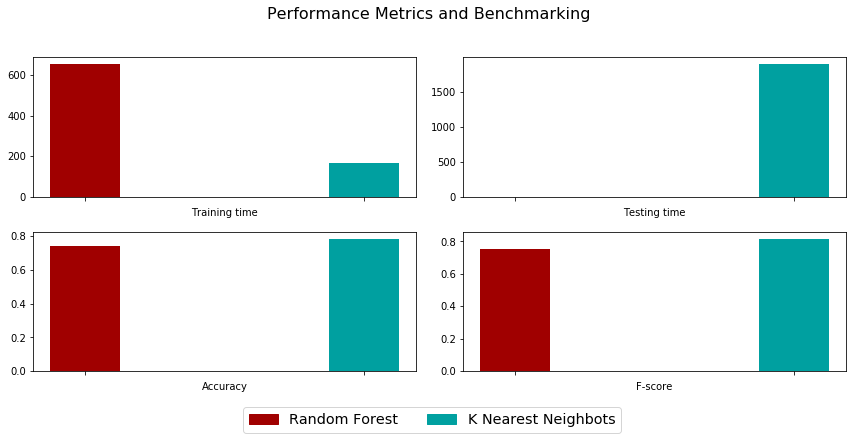



Results: 
{'time_train_b_model': 168.1840000152588, 'time_train_model': 655.2179999351501, 'fbeta_b_model': 0.81711036938850479, 'fbeta_model': 0.75594138980033743, 'time_test_b_model': 1896.0629999637604, 'accuracy_b_model': 0.78345313466939592, 'time_test_model': 0.5920000076293945, 'accuracy_model': 0.74208597134288568}


In [17]:
import matplotlib.patches as mpatches

def plot_comparison():
    
    x = np.arange(2)
     
    colors = ['#A00000','#00A0A0']
    learners = ['Random Forest', 'K Nearest Neighbots']
    
    fig = plt.figure(figsize = (12,5))
    
    ax1 = fig.add_subplot(221)
    ax1.bar(x, [results['time_train_model'],results['time_train_b_model']], 0.25, color=colors, align='center')
    plt.xticks(x, '')
    plt.xlabel('Training time')
    
    ax2 = fig.add_subplot(222)
    ax2.bar(x, [results['time_test_model'],results['time_test_b_model']], 0.25, color=colors, align='center')
    plt.xticks(x, '')
    plt.xlabel('Testing time')
    
    ax3 = fig.add_subplot(223)
    ax3.bar(x, [results['accuracy_model'],results['accuracy_b_model']], 0.25, color=colors, align='center')
    plt.xticks(x, '')
    plt.xlabel('Accuracy')
    
    ax4 = fig.add_subplot(224)
    ax4.bar(x, [results['fbeta_model'],results['fbeta_b_model']], 0.25, color=colors, align='center')
    plt.xticks(x, '')
    plt.xlabel('F-score')
    
    patches = []
    for i in range(2):
        patches.append(mpatches.Patch(color = colors[i], label = learners[i]))
        
    plt.legend(handles = patches, bbox_to_anchor=(-.08, -.35), loc = 'center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')
    plt.suptitle("Performance Metrics and Benchmarking", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

    
    
plot_comparison()

print "\n\nResults: \n", results

<hr/>

<table>
<thead>
<tr>
<th style="text-align:center">Metric</th>
<th style="text-align:center">Optimized Random Forest Model</th>
<th style="text-align:center">Benchmark KNN Model</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">Training time</td>
<td style="text-align:center">655.22</td>
<td style="text-align:center">168.20</td>
</tr>
<tr>
<td style="text-align:center">Testing time</td>
<td style="text-align:center">0.59</td>
<td style="text-align:center">1896.06</td>
</tr>
<tr>
<td style="text-align:center">Accuracy Score</td>
<td style="text-align:center">0.74</td>
<td style="text-align:center">0.78</td>
</tr>
<tr>
<td style="text-align:center">F-score</td>
<td style="text-align:center">0.75</td>
<td style="text-align:center">0.81</td>
</tr>
</tbody>
</table>

## Conclusion

The results shows that the optimized model is around 4x slower to train than the benchmarking model. This might be an advantage for the benchmarking model when training in large datasets. However, the benchmarking model is much slower than the optimized in testing. Around 3200x slower. This is a poor result, and it is too expensive in terms of time consuming. The accuracy score were almost the same for both models, whereas the benchmarking model had a considerably Fbeta score. In conclusion, both models proved that it is possible to make predictions about the mortality of patients for ICESP. Both models had an acceptable accuracy, what suggests that both can predict future results, however, In my opinion, the optimized model had a better overall result in this dataset in terms of time consumption and precision. If time to predict is an important factor the model to be chosen definitely is the random forest classifier. However the KNN proved to be an accurate model for the dataset, even if it wasn't optimized.  

<hr/>